# 最小二乗法

In [45]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [5]:
# 連立方程式を解く関数
# simultaneous_equation.ipynb を参照
def gauss_jordan_pivot_select(coefficient_matrix):
    d = coefficient_matrix.shape[0]
    w = coefficient_matrix.copy()
    for i in range(d):
        for j in range(i, d):
            if math.fabs(w[i][i]) < math.fabs(w[j][i]):
                tmp = w[i].copy()
                w[i] = w[j].copy()
                w[j] = tmp.copy()
        for j in range(d):
            if i != j:
                r = w[j][i] / w[i][i]
                w[j] = w[j] - w[i] * r
    for i in range(d):
        w[i] = w[i] / w[i][i]
    return w[:,-1]

In [25]:
def least_square(data, M, draw_graph=False):
    """
    dataの点を通るM次関数を求める
    """
    N = len(data)
    x = data[:,0]
    y = data[:,1]
    s = []
    for i in range(2*M+1):
        s_i = 0
        for j in range(N):
            s_i += math.pow(x[j], i)
        s.append(s_i)
    t = []
    for i in range(M+1):
        t_i = 0
        for j in range(N):
            t_i += y[j] * math.pow(x[j], i)
        t.append(t_i)
    t = np.reshape(t, (M+1, 1))
    c = []
    for row in range(M+1):
        for col in range(M+1):
            c.append(s[row+col])
    c = np.reshape(c, (M+1, M+1))
    matrix = np.concatenate((c, t), axis=1)
    result = gauss_jordan_pivot_select(matrix)
    if draw_graph:
        plt.scatter(x, y)
        x_min = min(x)
        x_max = max(x)
        w = x_max - x_min
        x_graph = np.arange(x_min-w*0.1, x_max+w*0.1, (x_max-x_min)/100.)
        def f(_x):
            _y = result[-1]
            for a in reversed(result[:-1]):
                _y = _y * _x + a
            return _y
        y_graph = f(x_graph)
        plt.plot(x_graph, y_graph)
    return result

    #coefficient = data

In [43]:
# 解きたい問題
M = 5
data = np.array(
    [
        [-3., 5.],
        [-2., -2.],
        [-1., -3.],
        [0., -1.],
        [1., 1.],
        [2., 4.],
        [3., 5.],
        [4., 2.]
    ]
)
pd.DataFrame(data, columns=['x', 'y'])

,x,y
0,-3.0,5.0
1,-2.0,-2.0
2,-1.0,-3.0
3,0.0,-1.0
4,1.0,1.0
5,2.0,4.0
6,3.0,5.0
7,4.0,2.0


,a
0,-1.236014
1,2.240618
2,0.399330
3,-0.152535
4,0.033071
5,-0.010577


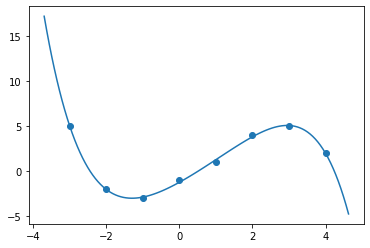

In [44]:
a = least_square(data, 5, draw_graph=True)
pd.DataFrame(data=a, columns=['a'])